# Get graph from wdf wavelet parameters

In [1]:
%matplotlib inline

In [2]:
! pip install pandas networkx scipy matplotlib 

In [3]:
import pandas as pd
import networkx as nx
import os

In [4]:
itf_data_file = {'H': "https://raw.githubusercontent.com/ghinanto/gnn_gw/refs/heads/main/triggers_hanford.csv", 'L': "https://raw.githubusercontent.com/ghinanto/gnn_gw/refs/heads/main/triggers_livingston.csv"} #, 'V': "triggers_virgo.csv"}
itf_site_list = ['H', 'L'] #, 'V']

In [5]:
import numpy as np
def get_wavelet_coeffs(node_data, wavelet_coeffs_index_start, wavelet_coeffs_index_end):
    return np.array(list(node_data.values())[wavelet_coeffs_index_start:wavelet_coeffs_index_end])

In [6]:
itf_graph = {}
itf_graph['H'] = nx.Graph()
itf_graph['L'] = nx.Graph()
#itf_graph['V'] = nx.Graph()

In [7]:
# matrix containing wavelet coefficients of the triggers, for each itf
coords_matrix = {}

for ITF in itf_site_list:
    df_itf_data = {}
    df_itf_data[ITF] = pd.read_csv(itf_data_file[ITF])
    print(df_itf_data[ITF])

    # get node features
    features = df_itf_data[ITF].columns.to_list() # get column labels, i.e. features of nodes
    features_number = len(features)

    # get index at which wavelet coefficients start
    i_wdf_params = features.index('wt0')
    features[i_wdf_params]

    # Add triggers as nodes 
    for row_index, row_data in df_itf_data[ITF].iterrows():
        node_label = row_index
        features_dict = {features[i]: row_data[i] for i in range(features_number)}
        features_dict["itf"] = ITF # add itf features to distinguish nodes from different itfs
        itf_graph[ITF].add_node(node_label, **features_dict)

    coords_matrix[ITF] = np.array([get_wavelet_coeffs(node_data, i_wdf_params, -1) for (_, node_data) in itf_graph[ITF].nodes(data=True)]) # '-1' beacause added 'itf' feature as last

                gps       gpsPeak  duration     EnWDF   snrMean    snrPeak  \
0      1.402436e+09  1.402436e+09  0.004883  0.520732  0.456914   6.113423   
1      1.402436e+09  1.402436e+09  0.024414  0.833374  0.856926  10.631658   
2      1.402436e+09  1.402436e+09  0.011719  1.448985  1.576981  18.531373   
3      1.402436e+09  1.402436e+09  0.026855  0.817591  0.870263   8.870364   
4      1.402436e+09  1.402436e+09  0.013184  0.863453  1.061410  13.339421   
...             ...           ...       ...       ...       ...        ...   
14864  1.402280e+09  1.402280e+09  0.240234  0.637610  0.334022   1.729293   
14865  1.402280e+09  1.402280e+09  0.017578  1.585443  1.304186  15.241391   
14866  1.402280e+09  1.402280e+09  0.249512  0.545407  0.340826   1.423641   
14867  1.402280e+09  1.402280e+09  0.011230  3.735621  2.590053  30.422796   
14868  1.402280e+09  1.402280e+09  0.108887  1.742825  1.191473   5.426179   

       freqMin    freqMean  freqMax  freqPeak  ... wt502  wt503

/tmp/ipykernel_1523/3814600334.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  features_dict = {features[i]: row_data[i] for i in range(features_number)}


                gps       gpsPeak  duration     EnWDF   snrMean    snrPeak  \
0      1.402311e+09  1.402311e+09  0.249512  1.299206  1.119919  12.482401   
1      1.402311e+09  1.402311e+09  0.004883  1.602021  1.427294  16.504490   
2      1.402311e+09  1.402311e+09  0.077148  0.578735  0.483786   5.742278   
3      1.402311e+09  1.402311e+09  0.237305  0.599978  0.555826   5.256761   
4      1.402311e+09  1.402311e+09  0.012207  1.270222  1.282895  15.256675   
...             ...           ...       ...       ...       ...        ...   
12981  1.402310e+09  1.402310e+09  0.006836  0.508889  0.406406   5.046473   
12982  1.402337e+09  1.402337e+09  0.249512  0.925400  0.849043   9.763186   
12983  1.402337e+09  1.402337e+09  0.024902  1.019829  1.007559  11.543435   
12984  1.402337e+09  1.402337e+09  0.005371  1.052435  1.115675  12.944642   
12985  1.402337e+09  1.402337e+09  0.029297  0.637274  0.640361   6.908903   

       freqMin    freqMean  freqMax  freqPeak  ... wt502  wt503

/tmp/ipykernel_1523/3814600334.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  features_dict = {features[i]: row_data[i] for i in range(features_number)}


In [8]:
coords_matrix

{'H': array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        ...,
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 6.00769010e-22, -4.50139902e-22,  1.75961583e-21, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00]],
       shape=(14869, 512)),
 'L': array([[ 0.00000000e+00,  1.41363759e-21,  7.55925398e-22, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  1.77720888e-21,  8.41548131e-22, ...,
 

# Multi ITF distances

In [9]:
from scipy.spatial.distance import cdist
import itertools

# the matrix of distances in the 512-dim space of wavelet coefficients between node 'i' from itf H and node 'j' from itf 'L'
dists_cdist = {} 
for itf_A, itf_B in itertools.combinations(itf_site_list, 2):
    dists_cdist[itf_A+'-'+itf_B] = cdist(coords_matrix[itf_A], coords_matrix[itf_B])

print(dists_cdist)
print("Distance between node(trigger) 2 from itf H and node 56 from itf L", dists_cdist['H-L'][2][56])

{'H-L': array([[7.70443179e-21, 1.06529614e-20, 4.06452427e-21, ...,
        4.74636767e-21, 5.41097991e-21, 3.44925632e-21],
       [8.23250706e-21, 1.10419175e-20, 5.08882465e-21, ...,
        7.95340583e-21, 6.21727290e-21, 4.61228229e-21],
       [1.03841770e-20, 9.23299620e-21, 7.84180901e-21, ...,
        8.21593677e-21, 8.61697827e-21, 7.54128504e-21],
       ...,
       [7.29400430e-21, 1.07510227e-20, 4.36662557e-21, ...,
        4.96004646e-21, 5.70813753e-21, 3.61140463e-21],
       [2.21620511e-20, 2.30991563e-20, 2.12970935e-20, ...,
        2.11637371e-20, 2.18270272e-20, 2.09097992e-20],
       [1.48949471e-20, 1.66152421e-20, 1.32616399e-20, ...,
        1.36025434e-20, 1.61218928e-20, 1.32258216e-20]],
      shape=(14869, 12986))}
Distance between node(trigger) 2 from itf H and node 56 from itf L 1.0709868484735172e-20


In [10]:
np.prod(dists_cdist['H-L'].shape) # number of distances computed

np.int64(193088834)

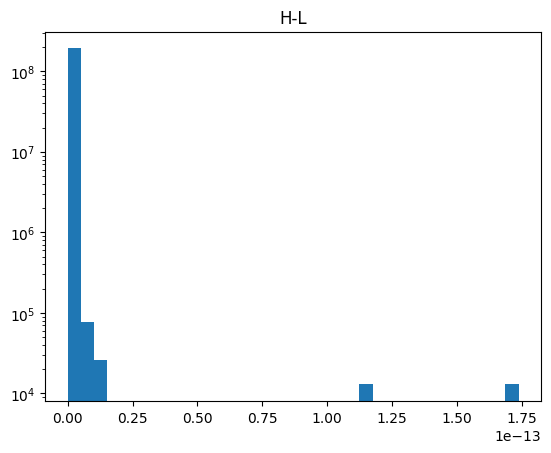

In [11]:
import matplotlib.pyplot as plt

# distribution of distances
plt.hist(dists_cdist['H-L'].flatten(), bins=int(np.sqrt(np.prod(dists_cdist['H-L'].shape))/400), log=True)
plt.title('H-L')
plt.show()

In [12]:
# get the H-L graph as union between the two
itf_graph['H-L'] = nx.union(itf_graph['H'], itf_graph['L'], rename=("H", "L"))

In [29]:
itf_graph['H'].number_of_nodes()

14869

## Distance
Which is the optimal distance to get true correlations and not to over-connect or under-connect the network? 
With 1e-21 we get few triggers per custer so it maybe ok as a firs start.

In [ ]:
max_distance_to_connect = 1e-21

for node_A in list(itf_graph['H']):
    for node_B in list(itf_graph['L']):
        if dists_cdist['H-L'][node_A][node_B] < max_distance_to_connect: # here node_A and node_B are integer indexes
            itf_graph['H-L'].add_edge('H'+str(node_A), 'L'+str(node_B)) # here we add the itf identifier to get the correct node labels in the union network

In [ ]:
HL_subgraphs = list(nx.connected_components(itf_graph['H-L']))#[itf_graph['H-L'].subgraph(c).copy() for c in nx.connected_components(itf_graph['H-L'])]
HL_subgraphs

[{'H0',
  'H1048',
  'H1092',
  'H11271',
  'H1145',
  'H1240',
  'H12451',
  'H1291',
  'H1310',
  'H1342',
  'H1477',
  'H1532',
  'H1611',
  'H1818',
  'H185',
  'H2025',
  'H2042',
  'H2063',
  'H2079',
  'H2267',
  'H2413',
  'H2560',
  'H2571',
  'H2706',
  'H2921',
  'H3136',
  'H3317',
  'H347',
  'H3493',
  'H359',
  'H3659',
  'H3734',
  'H3879',
  'H4042',
  'H4199',
  'H4416',
  'H4434',
  'H4502',
  'H4576',
  'H4677',
  'H4719',
  'H4737',
  'H4749',
  'H4799',
  'H4816',
  'H4941',
  'H5044',
  'H5271',
  'H5293',
  'H5369',
  'H5486',
  'H564',
  'H6152',
  'H617',
  'H6310',
  'H717',
  'H7270',
  'H7432',
  'H7665',
  'H7743',
  'H7828',
  'H7861',
  'H795',
  'H84',
  'H8405',
  'H8444',
  'H8610',
  'H8683',
  'H8763',
  'H9240',
  'H9471',
  'H9488',
  'H9577',
  'H966',
  'H981',
  'L10047',
  'L10101',
  'L10120',
  'L10160',
  'L10241',
  'L10263',
  'L6139',
  'L6208',
  'L6343',
  'L6373',
  'L6503',
  'L6707',
  'L6854',
  'L6945',
  'L6964',
  'L7049',
  'L7

In [ ]:
HL_subgraphs_clusters = [subg for subg in HL_subgraphs if len(subg)>1] # every node not connected to any other is considered as a subgraph, so we strip them out to get only the clusters
HL_subgraphs_clusters 

[{'H0',
  'H1048',
  'H1092',
  'H11271',
  'H1145',
  'H1240',
  'H12451',
  'H1291',
  'H1310',
  'H1342',
  'H1477',
  'H1532',
  'H1611',
  'H1818',
  'H185',
  'H2025',
  'H2042',
  'H2063',
  'H2079',
  'H2267',
  'H2413',
  'H2560',
  'H2571',
  'H2706',
  'H2921',
  'H3136',
  'H3317',
  'H347',
  'H3493',
  'H359',
  'H3659',
  'H3734',
  'H3879',
  'H4042',
  'H4199',
  'H4416',
  'H4434',
  'H4502',
  'H4576',
  'H4677',
  'H4719',
  'H4737',
  'H4749',
  'H4799',
  'H4816',
  'H4941',
  'H5044',
  'H5271',
  'H5293',
  'H5369',
  'H5486',
  'H564',
  'H6152',
  'H617',
  'H6310',
  'H717',
  'H7270',
  'H7432',
  'H7665',
  'H7743',
  'H7828',
  'H7861',
  'H795',
  'H84',
  'H8405',
  'H8444',
  'H8610',
  'H8683',
  'H8763',
  'H9240',
  'H9471',
  'H9488',
  'H9577',
  'H966',
  'H981',
  'L10047',
  'L10101',
  'L10120',
  'L10160',
  'L10241',
  'L10263',
  'L6139',
  'L6208',
  'L6343',
  'L6373',
  'L6503',
  'L6707',
  'L6854',
  'L6945',
  'L6964',
  'L7049',
  'L7

# Single ITF distances

In [12]:
from scipy.spatial.distance import pdist

dists_pdist = {}
for ITF in itf_site_list:
    dists_pdist[ITF] = pdist(coords_matrix[ITF])
    dists_avrg = np.average(dists_pdist[ITF])
    print("avrg distance", np.average(dists_pdist[ITF]))
    dists_max = np.max(dists_pdist[ITF])
    print("max", dists_max)
    dists_min = np.min(dists_pdist[ITF])
    print("min", dists_min)

dists_pdist


avrg distance 4.872958325402869e-17
max 2.06731852653346e-13
min 1.8958098694862934e-22
avrg distance 2.173639630957193e-20
max 3.887394783047708e-18
min 2.1127878944763055e-22


{'H': array([4.31989949e-21, 7.36609556e-21, 4.59044268e-21, ...,
        2.09720248e-20, 1.31656199e-20, 2.35324223e-20], shape=(110536146,)),
 'L': array([1.21292513e-20, 8.25257952e-21, 9.14186007e-21, ...,
        6.52080952e-21, 5.01394280e-21, 5.64715148e-21], shape=(84311605,))}

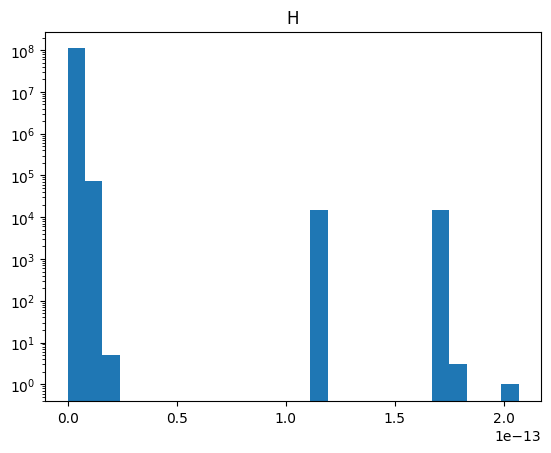

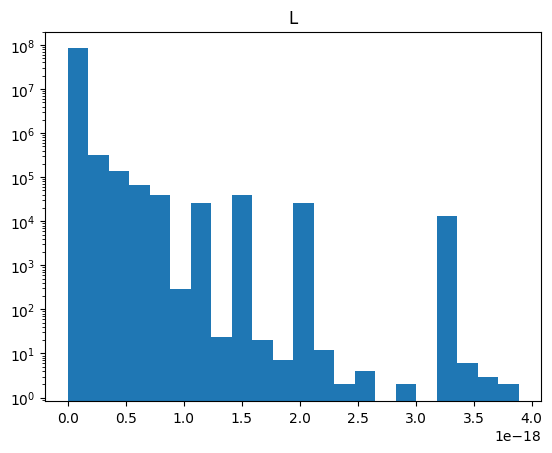

In [15]:
import matplotlib.pyplot as plt
for ITF in itf_site_list:
    plt.hist(dists_pdist[ITF], bins=int(np.sqrt(len(dists_pdist[ITF]))/400), log=True)
    plt.title(ITF)
    plt.show()

In [16]:
from scipy.spatial.distance import squareform

dists_matrix = {}
for ITF in itf_site_list:
    dists_matrix[ITF] = squareform(dists_pdist[ITF])

dists_matrix

{'H': array([[0.00000000e+00, 4.31989949e-21, 7.36609556e-21, ...,
         3.33098284e-21, 2.12960528e-20, 1.31171198e-20],
        [4.31989949e-21, 0.00000000e+00, 7.97716382e-21, ...,
         4.55384607e-21, 2.11250154e-20, 1.34596698e-20],
        [7.36609556e-21, 7.97716382e-21, 0.00000000e+00, ...,
         7.28404116e-21, 2.19160318e-20, 1.47227900e-20],
        ...,
        [3.33098284e-21, 4.55384607e-21, 7.28404116e-21, ...,
         0.00000000e+00, 2.09720248e-20, 1.31656199e-20],
        [2.12960528e-20, 2.11250154e-20, 2.19160318e-20, ...,
         2.09720248e-20, 0.00000000e+00, 2.35324223e-20],
        [1.31171198e-20, 1.34596698e-20, 1.47227900e-20, ...,
         1.31656199e-20, 2.35324223e-20, 0.00000000e+00]],
       shape=(14869, 14869)),
 'L': array([[0.00000000e+00, 1.21292513e-20, 8.25257952e-21, ...,
         8.60421935e-21, 8.97572930e-21, 7.85892778e-21],
        [1.21292513e-20, 0.00000000e+00, 1.10376970e-20, ...,
         1.12292173e-20, 1.15847679e-20, 1.0